## Проектная работа по модулю “Математика и статистика в Python”

#### 1.Загрузить файл hr.csv.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
import scipy.stats as sts
%matplotlib inline

In [2]:
hr = pd.read_csv('C:\\Users\\Dmitry\\Documents\\Учеба\\3 Python и математика для анализа данных\\3.19 Итоговая работа\\HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


satisfaction_level - уровень удовлетворенности сотрудника

last_evaluation - последняя оценка

number_project - количество проектов

average_montly_hours - среднее количество часов работы в месяц

time_spend_company - лет в компании

Work_accident - несчастный случай на работе

left - уволился

promotion_last_5years - повышения за последние 5 лет

sales - подразделение

salary - уровень зарплаты

In [14]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### 2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
#среднее
hr.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [5]:
#медиана
hr.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [6]:
#мода
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#минимум
hr.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object

In [8]:
#максимум
hr.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

In [13]:
#СКО
np.std(hr)

satisfaction_level        0.248622
last_evaluation           0.171163
number_project            1.232551
average_montly_hours     49.941434
time_spend_company        1.460088
Work_accident             0.351707
left                      0.425910
promotion_last_5years     0.144277
dtype: float64

In [15]:
import pandas_profiling
pandas_profiling.ProfileReport(hr)

Number of variables,10
Number of observations,14999
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,80.0 B
Numeric,5
Categorical,2
Boolean,3
Date,0
Text (Unique),0
Rejected,0


#### 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [7]:
hr['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [5]:
hr['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [4]:
# заменим тексовые значения в столбцах на числовые
hr2 = hr
def classification(a):
    if a == 'sales':
        return 1
    elif a == 'accounting':
        return 2
    elif a == 'hr':
        return 3
    elif a == 'technical':
        return 4
    elif a == 'support':
        return 5
    elif a == 'management':
        return 6
    elif a == 'IT':
        return 7
    elif a == 'product_mng':
        return 8
    elif a == 'marketing':
        return 9
    elif a == 'RandD':
        return 10
def classification2(b):
    if b == 'low':
        return 1
    elif b == 'medium':
        return 2
    elif b == 'high':
        return 3

In [7]:
hr2['sales_mod'] = hr2['sales'].apply(classification)
hr2['salary_mod'] = hr2['salary'].apply(classification2)

In [8]:
hr2 = hr2[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales_mod', 'salary_mod']].reset_index()
hr2.head()

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_mod,salary_mod
0,0,0.38,0.53,2,157,3,0,1,0,1,1
1,1,0.80,0.86,5,262,6,0,1,0,1,2
2,2,0.11,0.88,7,272,4,0,1,0,1,2
3,3,0.72,0.87,5,223,5,0,1,0,1,1
4,4,0.37,0.52,2,159,3,0,1,0,1,1


In [30]:
# матрица корреляций
hr2.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_mod,salary_mod
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119
sales_mod,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415
salary_mod,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000


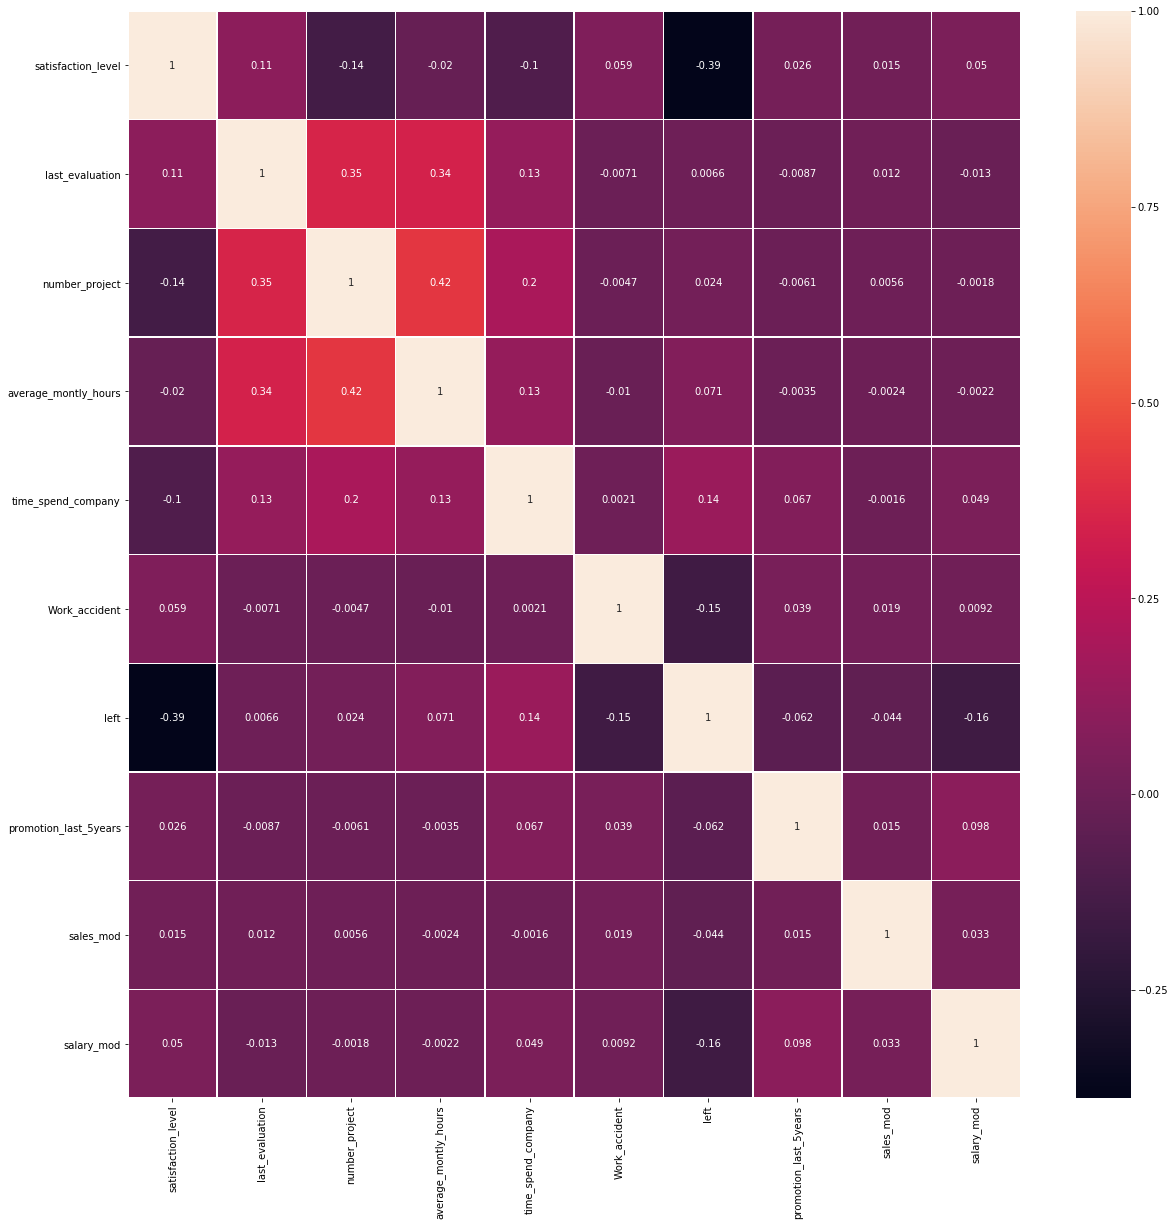

In [32]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(hr2.corr(), annot = True, linewidths=.5, ax=ax)
# умеренная корреляция у количества проектов со средними часами работы и с последней оценкой
# а также у уровня удовлетворенности и уходом
# между остальными переменными либо корреляция слабая, либо отсутствует

#### 4.Визуализировать несколько взаимосвязей между переменными.

In [50]:
# для визуализации взаимосвязей возьмем такие параметры как количество проектов, количество часов, отдел и уровень зп 
hr_viz = hr2.iloc[:,[1,2,3,4,5]]
hr_viz.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6


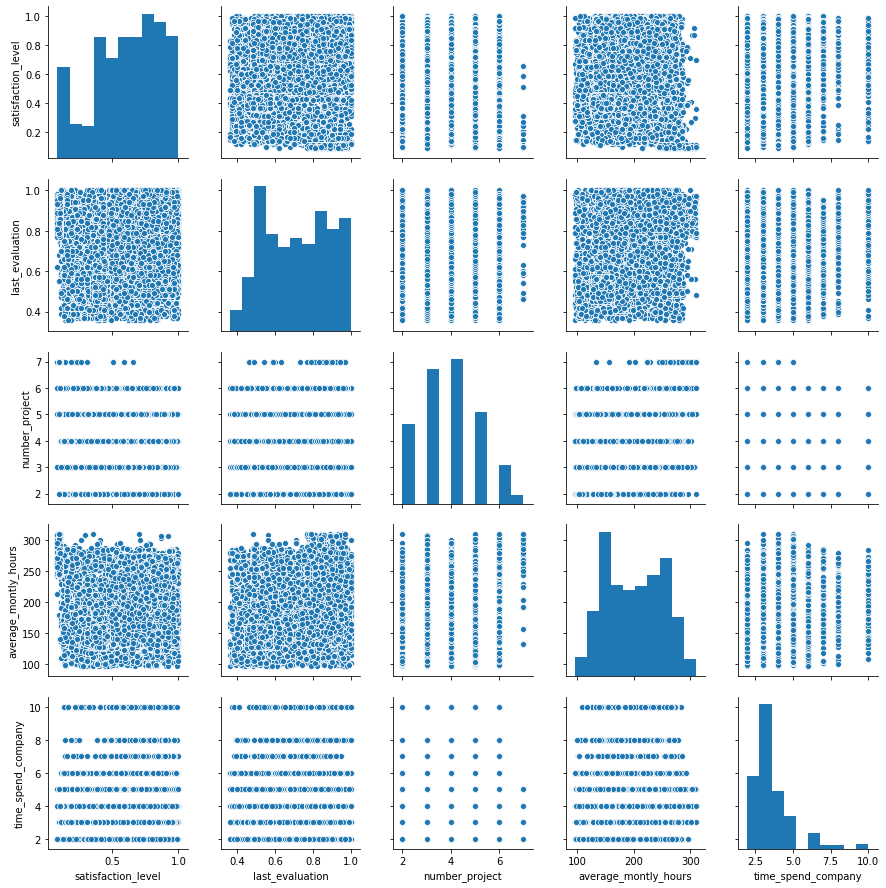

In [51]:
pair_plot = sns.pairplot(hr_viz)
pair_plot
# графики получаются непоказательными т.к. значений в выборке очень много и точки заполняют весь возможный интервал
# значений. Однако, можно заметить, что уровень удовлетворенности не поднимается выше ~0.6 у сотрудников с 7 проектами.
# также нету людей с 7 проектами, которые провели бы в компании более 5 лет.

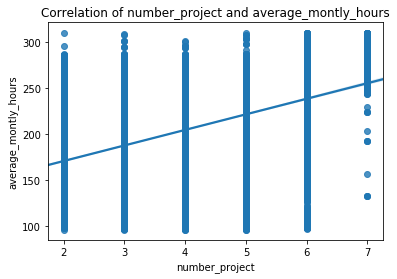

In [5]:
sns.regplot(x=hr2['number_project'], y=hr2['average_montly_hours'], fit_reg=True)
plt.title("Correlation of number_project and average_montly_hours")
plt.xlabel('number_project')
plt.ylabel('average_montly_hours')
plt.show()
# на данном графике заметна корреляция между количеством рабочих часов и количеством проектов. Чем больше проектов - тем
# больше приходится работать.

#### 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

У менеджеров столько же проектов, сколько и у содтрудников других отделов

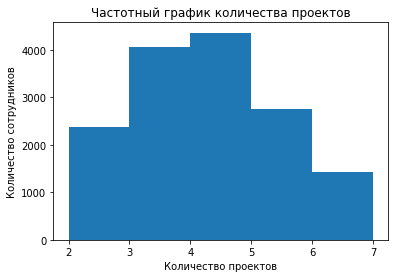

In [34]:
number_project = hr2['number_project']
plt.hist(number_project, 5)
plt.xlabel('Количество проектов')
plt.ylabel('Количество сотрудников')
plt.title('Частотный график количества проектов')
plt.show()
# распределение напоминает нормальное, можно провести тест

In [35]:
total = hr2['number_project']
managers = hr2[hr2['sales_mod'] == 6]['number_project']

In [37]:
len(total), len(managers)

(14999, 630)

In [38]:
total = total.sample(550)
managers = managers.sample(550)

In [39]:
statistics.variance(total), statistics.variance(managers)

(1.5670938897168405, 1.3993343268753105)

In [40]:
sts.ttest_ind(total, managers)
# p-value > 0.05, гипотеза верная. у менеджеров столько же проектов, сколько и у сотрудников других отделов. 

Ttest_indResult(statistic=-1.064560110844065, pvalue=0.2873090865824691)

Менеджеры работают столько же, сколько и остальные сотрудники

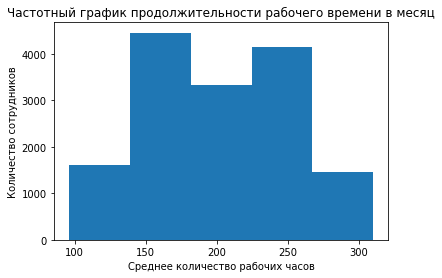

In [16]:
work_time = hr2['average_montly_hours']
plt.hist(work_time, 5)
plt.xlabel('Cреднее количество рабочих часов')
plt.ylabel('Количество сотрудников')
plt.title('Частотный график продолжительности рабочего времени в месяц')
plt.show()
# распределение напоминает нормальное, можно провести тест

In [18]:
total = hr2['average_montly_hours']
managers = hr2[hr2['sales_mod'] == 6]['average_montly_hours']

In [19]:
len(total), len(managers)

(14999, 630)

In [22]:
total = total.sample(550)
managers = managers.sample(550)

In [24]:
statistics.variance(total), statistics.variance(managers)

(2556.465388309323, 2292.4238582546777)

In [26]:
sts.ttest_ind(total, managers)
# p-value > 0.05, гипотеза верная. Менеджеры работают одинаково по времени со всеми.

Ttest_indResult(statistic=1.9411396704245902, pvalue=0.05249695685049619)

#### 6.Рассчитать сколько работников работает в каждом департаменте.

In [38]:
hr['sales'].value_counts()
# больше всего в продажах, меньше - менеджеров

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

#### 7.Показать распределение сотрудников по зарплатам.

In [33]:
bar = hr.groupby('salary').count().sort_values('sales').reset_index()

<BarContainer object of 3 artists>

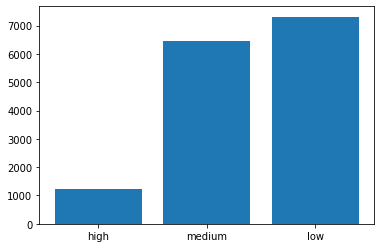

In [31]:
# так как значения зарплат не в числах, то распределение и нет смысла строить, достаточно барплота
plt.bar(bar['salary'], bar['sales'])
# как видим из распределения, сотрудников со средней и низкой зарплатой примерно одинаково, но сотрудников с высоким
# окладом в разы меньше.

#### 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [38]:
pivot = hr.pivot_table(index = 'sales', columns = 'salary', values = 'satisfaction_level', aggfunc = 'count')

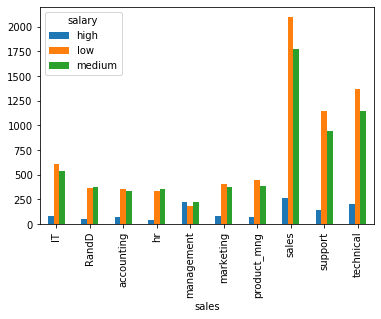

In [39]:
pivot.plot(kind='bar')
# у менеджеров зп распределены примерно поровну, у продажников самая маленькая доля людей с высокой зп

#### 9.Сколько сотрудников покинули компанию.

In [21]:
hr['left'].value_counts()
# компанию покинул 3 571 человек

0    11428
1     3571
Name: left, dtype: int64

#### 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [ ]:
# проверять причины ухода сотрудников я буду с помощью Random forest и метода feature_importances
# для начала разобью столбец left на 2 столбца:

In [93]:
hr_modified = hr2

In [94]:
def left_y(a):
    if a == 1:
        return 1
    return 0

def left_n(b):
    if b == 0:
        return 1
    return 0

In [95]:
hr_modified['left_y'] = hr_modified['left'].apply(left_y)
hr_modified['left_n'] = hr_modified['left'].apply(left_n)

In [96]:
hr_modified = hr_modified.iloc[:,[1,2,3,4,5,6,8,9,10,11,12]]

In [98]:
hr_modified.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_mod,salary_mod,left_y,left_n
0,0.38,0.53,2,157,3,0,0,1,1,1,0
1,0.80,0.86,5,262,6,0,0,1,2,1,0
2,0.11,0.88,7,272,4,0,0,1,2,1,0
3,0.72,0.87,5,223,5,0,0,1,1,1,0
4,0.37,0.52,2,159,3,0,0,1,1,1,0


In [99]:
hr_modified['left_y'].sum(), hr_modified['left_n'].sum()
# проверка сумм, все сошлось. разбил на 2 столбца верно

(3571, 11428)

In [104]:
input_x = hr_modified.iloc[:, :9]
output_y = hr_modified.iloc[:, 9:]

In [107]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
targets=(output_y.iloc[:,:]==1).idxmax(1)
print(targets.value_counts())
Y=le.fit_transform(targets)

left_n    11428
left_y     3571
dtype: int64


In [108]:
from sklearn.model_selection import train_test_split
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(input_x, Y, test_size=0.2)

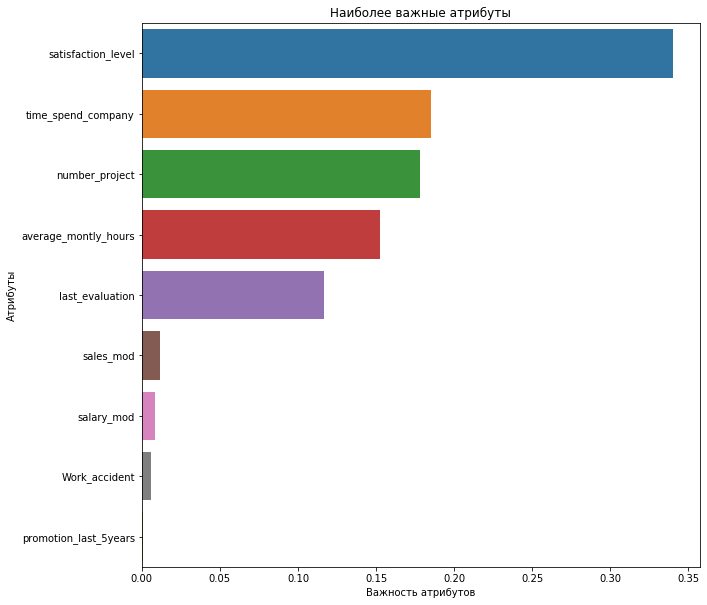

In [109]:
from sklearn.ensemble import RandomForestClassifier
# создаем модель деревья решений
model=RandomForestClassifier(n_estimators=100)
# обучаем модель
model.fit(X_train_30,y_train_30)
headers = list(X_train_30.columns.values)
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [ ]:
# самым важным атрибутом является уровень удовлетворенности. это было заметно еще на матрице корреляций.
# чем ниже уровень удовлетворенности, тем чаще встречается значение "1" в столбце ухода.
# отдел, зарплата, несчастные случаи и повышения практически не влияют на уход сотрудника.

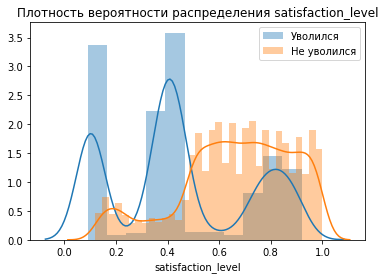

In [11]:
# рассмотрим самый важный атрибут (уровень удовлетворенности) подробнее
left_y = hr2[hr2['left'] == 1]['satisfaction_level']
left_n = hr2[hr2['left'] == 0]['satisfaction_level']
sns.distplot(left_y)
sns.distplot(left_n)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['Уволился', 'Не уволился'])
plt.show()
# условная граница удовлетворенности равняется 0.5. Если удовлетворенность более 0.5, то сотрудник, обычно, продолжает 
# работать.

In [13]:
# среднии значения удовлетворенности сотрудников, которые уволились и которые продолжают работать
left_y.mean(), left_n.mean()

(0.44009801176140917, 0.666809590479516)

#### 11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете